# Степанов Никита 6308, лабораторная 2, 3 вариант

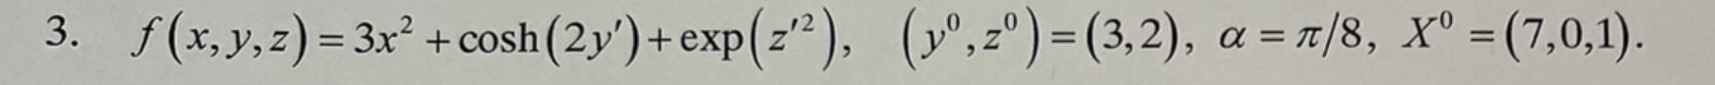

# Минимум по направлению

In [70]:
from math import *
import numpy

X0 = [7, 0, 1]
#X0 = [-2, 1, 0]

#p = [-7, 3, 1] #для проверки, вектор через минимум
#p = [1, 0, 0]
#p /= numpy.linalg.norm(p)

a = pi/8 
y0, z0 = 3, 2

d = 10**(-3)

def turn(y, z):
    yN = (y - y0) * cos(a) + (z - z0) * sin(a)
    zN = (z - z0) * cos(a) - (y - y0) * sin(a)
    return yN, zN

def f(x, y, z):
    yN, zN = turn(y, z)
    return 3 * x**2 + cosh(2 * yN) + exp(zN**2)

def g(t):
    x = X0[0] + p[0] * t
    y = X0[1] + p[1] * t
    z = X0[2] + p[2] * t

    return f(x, y, z)

def methGS(a, b):
    F = ((5**(0.5) + 1) / 2) # = 1,61

    x = a + (b - a) / F
    lx = a + b - x

    Fx = g(x)
    Flx = g(lx)

    while abs(b-a) > 2 * d:
        if Flx > Fx:
            a = lx
            lx = x 
            Flx = Fx
        else:
            b = x    
        
        x = a + b - lx 
        Fx = g(x)
    
        if lx > x:
            lx, x = x, lx
            Flx, Fx = Fx, Flx
    
    return lx

t = methGS(-10, 10)
print('t =', t)
res = X0
    
for i in range(3):
    res[i] += p[i] * t
    
print('min =', res)

t = 7.680760641462429
min = [0.0003509560854251248, 2.9998495902491036, 1.999949863416368]


# Координатный спуск

In [20]:
from math import *
import numpy as np

X0 = [7, 0, 1]
#X0 = [-15, 15, 20]

a = pi/8

y0, z0 = 3, 2
#y0, z0 = -15, -7

d = 10**(-6)

def turn(y, z):
    yN = (y - y0) * cos(a) + (z - z0) * sin(a)
    zN = (z - z0) * cos(a) - (y - y0) * sin(a)
    return yN, zN

def f(x, y, z):
    yN, zN = turn(y, z)
    return 3 * x**2 + cosh(2 * yN) + exp(zN**2)

pX = [1, 0, 0]
pY = [0, 1, 0]
pZ = [0, 0, 1]

point = X0

def g(t, p_):
    x = point[0] + p_[0] * t
    y = point[1] + p_[1] * t
    z = point[2] + p_[2] * t
    
    return f(x, y, z)

def methGS(a, b, p):
    F = ((5**(0.5) + 1) / 2) # = 1,61

    x = a + (b - a) / F
    lx = a + b - x

    Fx = g(x, p)
    Flx = g(lx, p)

    while abs(b-a) > 2 * d:
        if Flx > Fx:
            a = lx
            lx = x 
            Flx = Fx
        else:
            b = x    
        
        x = a + b - lx 
        Fx = g(x, p)
    
        if lx > x:
            lx, x = x, lx
            Flx, Fx = Fx, Flx
    
    return lx

def changePoint(p, t):
    for i in range(3):
        point[i] += p[i] * t

lastP = point.copy()

it = 1

#while it < 100:
while True:
    changePoint(pX, methGS(-10, 10, pX))
    changePoint(pY, methGS(-10, 10, pY))
    changePoint(pZ, methGS(-10, 10, pZ))
    #print('point:', point)
    #print(max(abs(lastP[0] - point[0]), abs(lastP[1] - point[1]), abs(lastP[2] - point[2])))

    if max(abs(lastP[0] - point[0]), abs(lastP[1] - point[1]), abs(lastP[2] - point[2])) < d:
        break
    lastP = point.copy()
    it += 1
    #print('lastP:', lastP)
    
print('it =', 3 * it)
print('min =', point)

it = 18
min = [-5.7537993924938746e-08, 2.9999998935695835, 2.0000001350506906]


# Антиградиентный спуск

In [25]:
from math import *
import numpy as np
# X0 = [7, 0, 1]
# y0, z0 = 3, 2

X0 = [15, -6, 3]
a = pi / 8
y0, z0 = 1, 1

d = 10 ** (-3)

def turn(y, z):
    yN = (y - y0) * cos(a) + (z - z0) * sin(a)
    zN = (z - z0) * cos(a) - (y - y0) * sin(a)
    return yN, zN

def f(x, y, z):
    yN, zN = turn(y, z)
    return 3 * x ** 2 + cosh(2 * yN) + exp(zN ** 2)

def antiGrad(vec):
    eps = 10**(-5)
    x, y, z = vec
    func = f(x, y, z)
    return [-(f(x + eps, y, z) - func) / eps,
            -(f(x, y + eps, z) - func) / eps,
            -(f(x, y, z + eps) - func) / eps]

point = X0

def g(t, p_):
    x = point[0] + p_[0] * t
    y = point[1] + p_[1] * t
    z = point[2] + p_[2] * t

    return f(x, y, z)


def methGS(a, b, p):
    F = ((5 ** (0.5) + 1) / 2)  # = 1,61

    x = a + (b - a) / F
    lx = a + b - x

    Fx = g(x, p)
    Flx = g(lx, p)

    while abs(b - a) > 2 * d:
        if Flx > Fx:
            a = lx
            lx = x
            Flx = Fx
        else:
            b = x

        x = a + b - lx
        Fx = g(x, p)

        if lx > x:
            lx, x = x, lx
            Flx, Fx = Fx, Flx

    return lx

def changePoint(p, t):
    for i in range(3):
        point[i] += p[i] * t
        
lastP = point.copy()

it = 1

while True:
    #vector1 = grad(lastP)
    vector = antiGrad(lastP)
    if np.linalg.norm(vector) != 0:
        vector /= np.linalg.norm(vector)

    changePoint(vector, methGS(-10, 10, vector))

    if max(abs(lastP[0] - point[0]), abs(lastP[1] - point[1]), abs(lastP[2] - point[2])) < d:
        break
    lastP = point.copy()
    it += 1

print('it =', it)
print('min =', point)

it = 7
min = [0.00014740009710638435, 0.9999294761446241, 1.0001987812781032]


# Метод Ньютона

In [15]:
from math import *
import numpy as np
# X0 = [7, 0, 1]
# y0, z0 = 3, 2
# a = pi/8

X0 = [7, 0, 1]
a = pi/3
y0, z0 = 3, 2 

d = 10 ** (-3)

def turn(y, z):
    yN = (y - y0) * cos(a) + (z - z0) * sin(a)
    zN = (z - z0) * cos(a) - (y - y0) * sin(a)
    return yN, zN

def f(x, y, z):
    yN, zN = turn(y, z)
    return 3 * x ** 2 + cosh(2 * yN) + exp(zN ** 2)
    #return 3 * x ** 2 + (2 * yN**2) + (5 * zN**2)

def grad(vec):
    eps = 10**(-5)
    x, y, z = vec
    func = f(x, y, z)
    return [(f(x + eps, y, z) - func) / eps,
            (f(x, y + eps, z) - func) / eps,
            (f(x, y, z + eps) - func) / eps]

point = X0

def g(t, p_):
    x = point[0] + p_[0] * t
    y = point[1] + p_[1] * t
    z = point[2] + p_[2] * t

    return f(x, y, z)


def methGS(a, b, p):
    F = ((5 ** (0.5) + 1) / 2)  # = 1,61

    x = a + (b - a) / F
    lx = a + b - x

    Fx = g(x, p)
    Flx = g(lx, p)

    while abs(b - a) > 2 * d:
        if Flx > Fx:
            a = lx
            lx = x
            Flx = Fx
        else:
            b = x

        x = a + b - lx
        Fx = g(x, p)

        if lx > x:
            lx, x = x, lx
            Flx, Fx = Fx, Flx

    return lx

def secondDer(vec):
    eps = 10**(-5)
    x, y, z = vec
    fXX = 6
    fYY = (f(x, y + eps, z) + f(x, y - eps, z) - 2 * f(x, y, z)) / (eps**2)
    fZZ = (f(x, y, z + eps) + f(x, y, z - eps) - 2 * f(x, y, z)) / (eps**2)
    fYZ = (f(x, y + eps, z + eps) - f(x, y + eps, z) - f(x, y, z + eps) + f(x, y, z)) / (eps**2)
        
    return np.array([[fXX, 0, 0],
                    [0, fYY, fYZ],
                    [0, fYZ, fZZ]])

def invMat(vec):
    return np.linalg.inv(secondDer(vec))

lastP = point.copy()

it = 1
while True:
    invM = invMat(point)
    vector = grad(point)
    
    for i in range(3):
        point[i] -= (invM[i][0] * vector[0] + invM[i][1] * vector[1] + invM[i][2] * vector[2])    

    if max(abs(lastP[0] - point[0]), abs(lastP[1] - point[1]), abs(lastP[2] - point[2])) < d:
        break
    lastP = point.copy()
    it += 1

print('it =', it)
print('min =', point)

it = 10
min = [-5.000001862616917e-06, 2.9999964256842926, 1.9999958844054635]
